# <font color=#025dfa> Müzik Türlerini Kümeleme - Clustering Music Genres

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.
 
EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu çalışmamızda müzik türlerini kendi içlerinde kümeleyen bir model oluşturduk.
 
EN = In this study, we created a model that clusters music genres within themselves.

Kaynak/Source = https://thecleverprogrammer.com/2022/04/05/clustering-music-genres-with-machine-learning/#google_vignette

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from langdetect import detect
from googletrans import Translator

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('Spotify-2000.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
df.sample(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1292,1293,Heaven,Bryan Adams,album rock,1984,140,59,38,-7,12,34,243,5,3,76
549,550,Royals,Lorde,art pop,2013,85,43,67,-10,13,34,190,12,12,79
19,20,Cry Me a River,Justin Timberlake,dance pop,2002,74,65,62,-7,10,56,288,57,18,74
471,472,Dust Bowl,Joe Bonamassa,blues rock,2011,86,75,52,-7,20,70,273,36,5,44
542,543,Animals,Martin Garrix,big room,2013,128,87,68,-6,37,4,304,0,4,65


In [6]:
df.tail()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65
1993,1994,Blueberry Hill,Fats Domino,adult standards,1959,133,50,49,-10,16,83,148,74,3,56


In [7]:
df.shape

(1994, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [9]:
df.isnull().sum().sort_values(ascending=False)

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [10]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [11]:
df=df.drop('Index',axis=1)
df.head(1)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71


## <font color='#8b1cc7'> Sütün İşimlerini Orjinal, Türkçe Ve İngilizce Versiyonda Göster  - Show the Processes of Milk in Original, Turkish and English Version

In [12]:
common_abbreviations = {
    '':'',						
}
# TR = Kısaltmaların orjinal versiyonunu tanımladık
# EN = We defined the original version of the abbreviations

def expand_abbreviations(text, abbreviations):
    for abbr, full in abbreviations.items():
        text = re.sub(r'\b{}\b'.format(abbr), full, text)
    return text
# TR = Kısaltmaları tanıyan ve tam hallerine dönüştüren fonksiyon
# EN = Function that recognizes abbreviations and converts them to their full form


def translate_text(text, dest_lang):
    translator = Translator()
    translation = translator.translate(text, dest=dest_lang)
    return translation.text
# TR = Çeviri işlemi için fonksiyon
# EN = Function for translation process

columns = df.columns # kısaltma yoksa columns=[] bu şekilde
rows = []

for col in columns:
    expanded_col = expand_abbreviations(col, common_abbreviations)
    try:
        language = detect(expanded_col)
    except:
        language = "unknown"
    
    if language == 'en':
        english_translation = expanded_col
        turkish_translation = translate_text(expanded_col, 'tr')
        row = [english_translation, turkish_translation]
        column_names = ['English', 'Türkçe']
    elif language == 'tr':
        turkish_translation = expanded_col
        english_translation = translate_text(expanded_col, 'en')
        row = [turkish_translation, english_translation]
        column_names = ['Türkçe', 'English']
    else:
        original_translation = expanded_col
        turkish_translation = translate_text(expanded_col, 'tr')
        english_translation = translate_text(expanded_col, 'en')
        row = [original_translation, turkish_translation, english_translation]
        column_names = ['Orjinal/Original', 'Türkçe', 'English']
    
    rows.append(row)


result_df = pd.DataFrame(rows, columns=column_names)
# TR = Yeni bir DataFrame oluşturduk
# EN = We created a new DataFrame

result_df = result_df.T
# TR = Satır ve sütunları çevir
# EN = Translate rows and columns

result_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Orjinal/Original,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Türkçe,Başlık,Sanatçı,En iyi tür,Year,Dakikada Beats (BPM),Enerji,Dans edilebilirlik,Ses yüksekliği (db),Canlılık,Değerlik,Uzunluk (süre),Akustiklik,Konuşma,Popülerlik
English,None,Artist,Top Genre,None,Beats Per Minute (BPM),Energy,None,Loudness (dB),Liveness,Valence,None,None,Speechiness,Popularity


In [13]:
df.head(1)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71


## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [14]:
x=df[["Beats Per Minute (BPM)", "Loudness (dB)", "Liveness", "Valence", "Acousticness", "Speechiness"]]
# TR = Hangi sütüna göre gruplandırdığımız seçiyoruz.
# EN = We choose which column we group by.

In [15]:
x.head()

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness
0,157,-14,11,68,94,3
1,135,-11,17,81,17,7
2,168,-9,7,52,2,17
3,173,-4,3,37,0,4
4,106,-5,10,87,1,3


In [16]:
model=KMeans(4)
# TR = KMeans(x) x ile kaç tane classes bölüneceğini belirttik.
# EN = We specified how many classes will be divided with KMeans(x) x.

In [17]:
model=model.fit(x)
# TR = fit özelliğini kullanıp x'i eğittik. fit=eğit demek. Eğitip modele eşitledik. 
# EN = We used the fit feature and trained x. fit = train. We trained it and equalized it to the model.

In [18]:
pred=model.predict(x)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.
pred

array([0, 1, 2, ..., 2, 2, 0])

In [19]:
x['Cluster']=pred
# TR = x adlı Data Frame'de Cluster adlı yeni bir sütün oluşturup, tahminimizi(pred) Cluster'a eşitledik.
# EN = We created a new column named Cluster in the Data Frame named x and set our prediction (pred) equal to Cluster.

In [20]:
x.head()

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Cluster
0,157,-14,11,68,94,3,0
1,135,-11,17,81,17,7,1
2,168,-9,7,52,2,17,2
3,173,-4,3,37,0,4,2
4,106,-5,10,87,1,3,1


In [21]:
silhouette_score(x,pred)
# TR = silhouette_score her bir örneğin kendi kümesi içindeki diğer örneklere olan benzerliğini, diğer kümelerdeki örneklere olan benzerliğine kıyasla ölçer.
# EN = silhouette_score measures the similarity of each sample to other samples within its cluster compared to its similarity to samples in other clusters.

0.25697794397339363

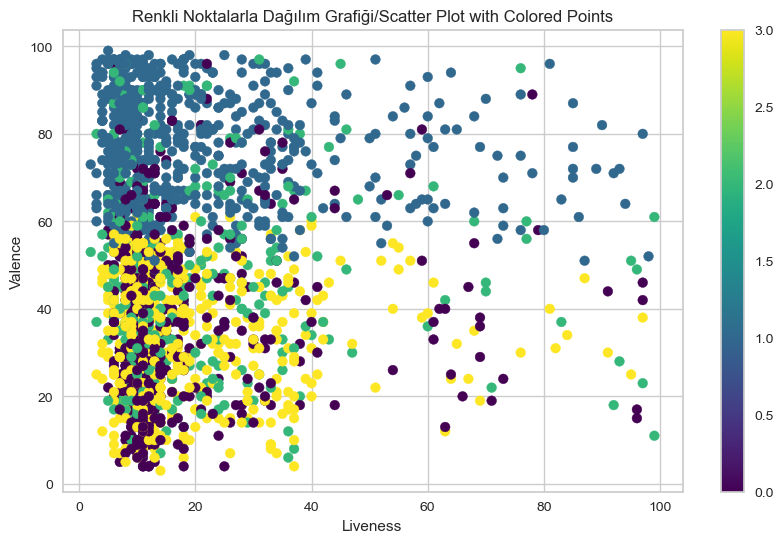

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x.Liveness ,x.Valence ,c=pred, cmap='viridis')
# plt.scatter(x.a ,x.b ,c=pred)
# TR = a yerine bir şeyin özelliği. Örnek araba silindirler. b yerine bir şeyin fiyatı.
# EN = A property of something instead of a. Sample car rollers. The price of something instead of b.

# TR = x.a x ekseninde tanımlıyor,x.b y ekseninde tanımlıyor.c=pred kümeleme algoritmasından elde edilen tahmin edilen küme etiketlerini veya sınıflandırma algoritmasından elde edilen sınıf etiketlerini içerir.
# EN = x.a defines on the x-axis, x.b defines on the y-axis.c=pred contains the predicted cluster labels obtained from the clustering algorithm or the class labels obtained from the classification algorithm.

plt.colorbar()
plt.xlabel("Liveness")
plt.ylabel("Valence")
plt.title("Renkli Noktalarla Dağılım Grafiği/Scatter Plot with Colored Points");

In [23]:
wcss=[]
#wscc = within cluster sun of squares = küme içi toplam kare kaybı
ss=[]
for i in range(2,10):
    # TR = 2 ile 9 arasında farklı küme sayıları için modeli test etmeyi ve inertia değerlerini hesaplamayı amaçlayabilir.
    # EN = It may aim to test the model and calculate inertia values ​​for different numbers of clusters between 2 and 9.
    
    model=KMeans(i)
    model=model.fit(x)
    pred=model.predict(x)
    ss1=silhouette_score(x,pred)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.2984699717624563
0.2587185850482263
0.2575546970425766
0.25023503501827227
0.25245140701258956
0.2580152484876604
0.2659847162374344
0.25755010344192925


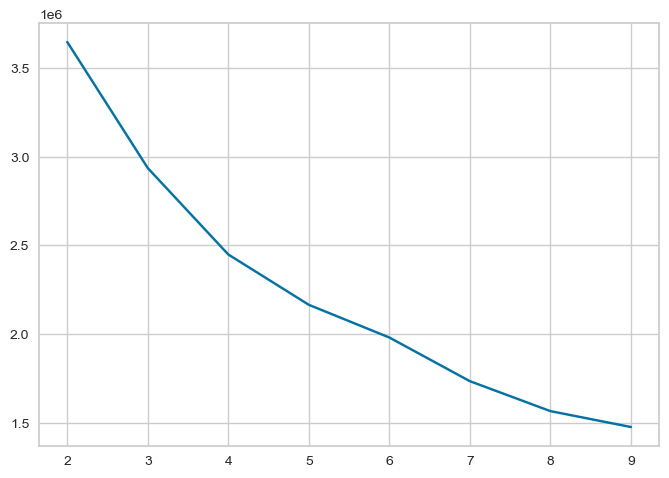

In [24]:
plt.plot(range(2,10),wcss);
# TR = Hemen Yukarıdaki satırda yapılan kodun tablosu.
# EN = Table of the code made in the line just above.

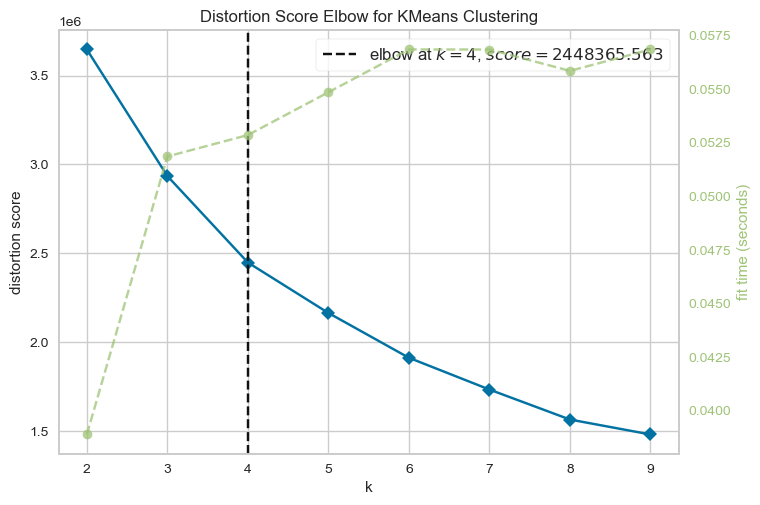

In [25]:
vis=KElbowVisualizer(model,k=(2,10))
# TR = Bu yöntem, özellikle k-means gibi kümeleme algoritmalarında en uygun küme sayısını belirlemek için oldukça faydalıdır.
# EN = This method is especially useful for determining the optimal number of clusters in clustering algorithms such as k-means.
vis.fit(x)
vis.show();

### <font color=#0fffff> Hiyerarşik kümeleme - Hierarchical Clustering

In [26]:
data=linkage(x,method='ward', metric='euclidean')

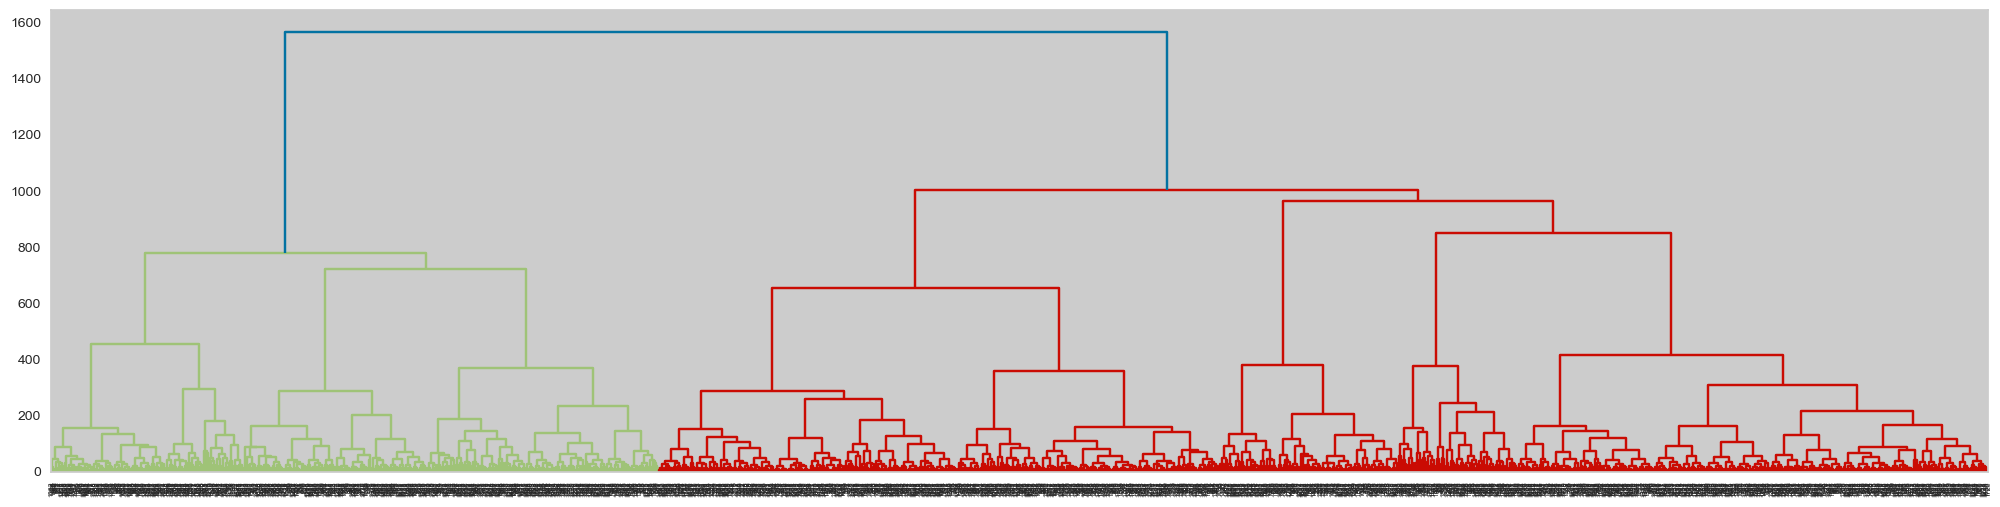

In [27]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [28]:
x['Popularity']=df['Popularity']

In [29]:
x[['Popularity','Cluster']]

,Popularity,Cluster
0,71,0
1,39,1
2,69,2
3,76,2
4,59,1
...,...,...
1989,63,0
1990,69,2
1991,74,2
1992,65,2


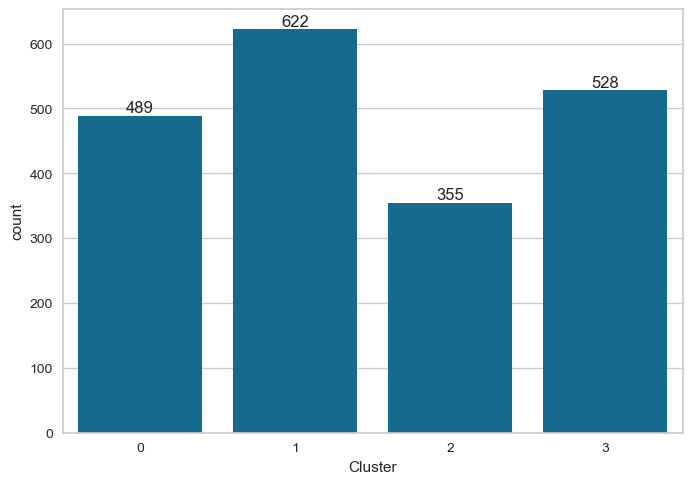

In [30]:
ax=sns.countplot(data=x,x='Cluster')
ax.bar_label(ax.containers[0]);

In [31]:
cols = list(x.columns)
cols.insert(0, cols.pop(cols.index('Popularity')))
x = x[cols]

In [32]:
x[x['Cluster']==0] 
# TR = vis'de çıkan sonuca göre oluşturacağız.
# EN = We will create it according to the result in vis.

,Popularity,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Cluster
0,71,157,-14,11,68,94,3,0
10,49,109,-16,11,31,88,4,0
15,48,133,-10,16,25,84,4,0
19,74,74,-7,10,56,57,18,0
25,50,130,-8,10,18,48,3,0
...,...,...,...,...,...,...,...,...
1981,50,75,-10,17,51,77,12,0
1987,68,119,-15,9,43,83,12,0
1988,66,168,-21,14,10,92,3,0
1989,63,94,-12,11,72,84,7,0


In [33]:
x[x['Cluster']==1] 

,Popularity,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Cluster
1,39,135,-11,17,81,17,7,1
4,59,106,-5,10,87,1,3,1
9,82,112,-3,24,66,0,7,1
12,34,102,-6,53,59,2,3,1
14,66,112,-5,14,82,0,3,1
...,...,...,...,...,...,...,...,...
1967,60,121,-17,5,79,16,3,1
1976,73,108,-9,7,87,58,8,1
1979,68,109,-5,12,77,41,7,1
1982,45,127,-6,83,65,0,4,1


In [34]:
x[x['Cluster']==2] 

,Popularity,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Cluster
2,69,168,-9,7,52,2,17,2
3,76,173,-4,3,37,0,4,2
8,77,148,-4,10,23,0,8,2
21,67,142,-10,11,35,5,4,2
29,59,154,-10,33,51,8,3,2
...,...,...,...,...,...,...,...,...
1984,67,154,-13,20,30,47,4,2
1986,73,167,-10,7,92,41,8,2
1990,69,175,-8,76,95,73,6,2
1991,74,168,-9,31,97,74,7,2


In [35]:
x[x['Cluster']==3] 

,Popularity,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Cluster
5,45,99,-9,14,14,0,2,3
6,74,102,-6,13,54,6,3,3
7,69,137,-5,12,21,0,14,3
11,74,124,-8,26,32,1,8,3
13,26,117,-2,81,40,18,10,3
...,...,...,...,...,...,...,...,...
1972,60,91,-9,10,54,34,3,3
1973,63,87,-10,10,43,4,5,3
1974,43,118,-10,14,19,6,3,3
1980,36,89,-9,31,25,4,3,3
